In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation plus

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harry-potter-fanfiction-data/hpcleanvlarge1.csv


# Notebook Description
This Notebook aims at making a first analysis of the data of the Fanfiction Harry Potter, on the summary of the fanfictions before starting a deeper exploration of the content of the fanfiction themselves.

In particular, a first goal would be to identify specifities of the different stories between languages, in terms of length, characters, etc.

A second objective will be to identify the main factors which determines if a story is finished or not. A first approximation, the length would be a major factor (a short story will be more easily finished than a long novel-like adventure), but we may identify (or not) other relevant factors.

In [2]:
# import Data
df = pd.read_csv("/kaggle/input/harry-potter-fanfiction-data/hpcleanvlarge1.csv", 
                 thousands=',') # this parameters setup the expected values for identifying large numbers (in american format for numbers)


df.head()

,Chapters,Favs,Follows,Published,Reviews,Updated,Words,author,characters,genre,language,rating,story_link,synopsis,title,published_mmyy,pairing
0,1,2.0,NaN,12/31/2019,1.0,NaN,6840,reviews,"Sirius B., Remus L., James P., Regulus B.",Angst/Hurt/Comfort,English,T,https://www.fanfiction.net/s/13466909/1/If-You...,Regulus and James aren't happy. They know they...,If You Change Your Mind,12-2019,NaN
1,1,1.0,NaN,12/31/2019,NaN,NaN,10962,JoyI9199,"Harry P., Draco M., Narcissa M., Charlie W.",Angst/Drama,English,M,https://www.fanfiction.net/s/13466894/1/Bloody...,When a plot from the Founder's age is revealed...,Bloody Ballgowns,12-2019,NaN
2,1,3.0,2.0,12/31/2019,NaN,NaN,8592,MoonytheMarauder1,"[James P., Regulus B.]",Angst,English,M,https://www.fanfiction.net/s/13466885/1/Nothin...,"Regulus Black is supposed to be dead, but he's...",Nothing Left To Do,12-2019,"James P., Regulus B."
3,2,NaN,NaN,12/31/2019,NaN,NaN,7260,LaviniaKatt,Cedric D.,Romance/Fantasy,English,M,https://www.fanfiction.net/s/13466880/1/Patien...,This is a spin off of Harry Potter taking plac...,Patience is a Virtue,12-2019,NaN
4,1,4.0,3.0,12/31/2019,NaN,NaN,1529,Rowena-Moon-Moon,NaN,NaN,English,T,https://www.fanfiction.net/s/13466807/1/An-Und...,Harry makes a new discovery and perhaps a few ...,An Understanding,12-2019,NaN


## Descriptive Analysis of the data

Before entering into the specificities of the fanfiction, let's have a first quick understanding of the structure of our data : number of rows & columns, number of empty values.

In [3]:
# Description of the number of rows & columns of the dataset
df.shape

(648493, 17)

In [4]:
# Simple distribution description for the numerical columns
df.describe()

,Chapters,Favs,Follows,Reviews,Words
count,648493.000000,576330.000000,505289.000000,596304.000000,6.484930e+05
mean,4.180192,60.017627,52.247219,36.752712,1.053018e+04
std,8.499502,311.424725,278.172211,202.629776,3.244711e+04
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,1.000000,3.000000,2.000000,3.000000,9.630000e+02
50%,1.000000,9.000000,6.000000,7.000000,2.177000e+03
75%,4.000000,29.000000,22.000000,19.000000,6.731000e+03
max,542.000000,27869.000000,19603.000000,38111.000000,3.315736e+06


In [5]:
# We were expecting more data to be described as numerical (like Words or follows).
# Let's have a look at the datatypes of the different columns to make sure they are all in a useful format.
# Description of the data types
df.dtypes

Chapters            int64
Favs              float64
Follows           float64
Published          object
Reviews           float64
Updated            object
Words               int64
author             object
characters         object
genre              object
language           object
rating             object
story_link         object
synopsis           object
title              object
published_mmyy     object
pairing            object
dtype: object

In [6]:
# We see that Follows, Words and Favs, which represents number of elements, are represented as objects.
# Let's see what are their values to determine if we can correctly transform them into floats to do statistics
print(df["Follows"].unique())

[      nan 2.000e+00 3.000e+00 ... 4.731e+03 1.240e+04 2.190e+03]


In [7]:
# We see that we need to remove the space at the beginning of the number and maybe change the coma to a point in order to manage the column as a float
# Let's change their types to float and run again the describe function to have basic statistic



In [8]:
# How to manage missing values ? Let's see how many we have 
df.isna().sum()

Chapters               0
Favs               72163
Follows           143204
Published              0
Reviews            52189
Updated           410228
Words                  0
author                 0
characters         63040
genre              59927
language               0
rating                 0
story_link             0
synopsis              10
title                 15
published_mmyy         0
pairing           256823
dtype: int64

In [9]:
# Missing values management will depends on the kind of values.
# All the columns associated with interactions ("Favs", "Follows", "Reviews") can be replaced by 0, which will help do statistics on them
df[["Favs", "Follows", "Reviews"]] = df[["Favs", "Follows", "Reviews"]].copy().fillna(value = 0, axis = 1)

#other columns can be kept as NaN for the moment

In [10]:
pd.Series(df["Follows"].unique())

0           0.0
1           2.0
2           3.0
3          70.0
4           1.0
         ...   
3135     1775.0
3136     1776.0
3137     4731.0
3138    12400.0
3139     2190.0
Length: 3140, dtype: float64

In [11]:
# This code was used to clean the data before finding the "thousand = ','" parameter in the import csv
# Let's clean the data with simple string parsing in order to change the type to integer
#df["Follows"] = df["Follows"].str.replace("^\s", "", regex = True) # remove the space at the beginning of the string
#df["Follows"] = df["Follows"].str.replace(",", "") #remove the coma


#df["Follows"] = df["Follows"].copy().astype('int')

# Analysis by Languages
Harry Potter Fanfiction are written in many languages across the world. Let's see if we identify differences between those languages

In [12]:
# count the number of story by languages
lang_count = df[["language", "title"]].copy().groupby(by = "language").count()
lang_count.reset_index(inplace = True) # realign the column names after the groupby
lang_count.sort_values(by = "title", ascending = False, inplace = True) # sort the result by number of stories, from the major one

lang_count

,language,title
11,English,506043
37,Spanish,51158
17,French,47618
32,Portuguese,21397
18,German,10499
31,Polish,3514
24,Indonesian,3369
38,Swedish,819
10,Dutch,794
25,Italian,630


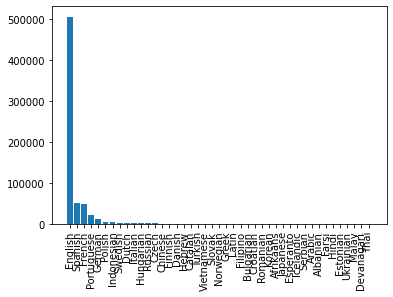

In [13]:
# Let's plot this into a chart to have a more visual representation !
x = lang_count['language'].values
y = lang_count['title'].values
x_pos = np.arange(len(x)) # define the position of the bars in the plot
plt.bar(x_pos, y)
plt.xticks(x_pos, x, rotation = 90) # define the name of the bars in the chart

plt.show()

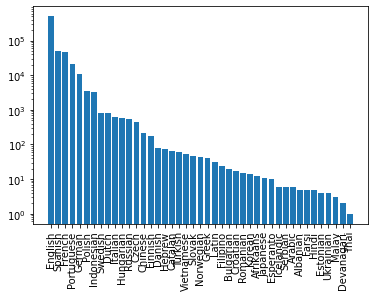

In [14]:
# We see that the English has 10 times more story than the second most popular language which is spanish.
# Let's plot the same data on a log scale to have a clearer view

x = lang_count['language'].values
y = lang_count['title'].values
x_pos = np.arange(len(x)) # define the position of the bars in the plot
plt.bar(x_pos, y)
plt.xticks(x_pos, x, rotation = 90) # define the name of the bars in the chart
plt.yscale("log") # display the y axis on a log scale

plt.show()

### First Conclusion on the languages
Considering the distribution of stories across languages, and the huge disparity between english and other languages (as expected), we will do all our other analysis in percentage of stories in the language in order to make proper comparison between languages on the content of the stories.

Furthermore, we will analyse two subsets of languages in order to have some significative result (statistics on icelandic stories based on six items, won't go very far, let's be honest !).
For simple proportional statitics, we can include all languages with more than 500 stories, which represents 11 languages.
For more advanced computation, we will only include languages with more than 3000 stories, which represents 7 languages

In [15]:
# Let's create 2 datasets to make our exploration on qualitative data
lang11 = ["English", "Spanish", "French", "Portuguese", "German", "Polish", "Indonesian", "Swedish", "Dutch", "Italian", "Hungarian", "Russian"]
df11 = df[df["language"].isin(lang11)]

lang7 = ["English", "Spanish", "French", "Portuguese", "German", "Polish", "Indonesian"]
df7 = df[df["language"].isin(lang7)]

In [16]:
df11.head()

,Chapters,Favs,Follows,Published,Reviews,Updated,Words,author,characters,genre,language,rating,story_link,synopsis,title,published_mmyy,pairing
0,1,2.0,0.0,12/31/2019,1.0,NaN,6840,reviews,"Sirius B., Remus L., James P., Regulus B.",Angst/Hurt/Comfort,English,T,https://www.fanfiction.net/s/13466909/1/If-You...,Regulus and James aren't happy. They know they...,If You Change Your Mind,12-2019,NaN
1,1,1.0,0.0,12/31/2019,0.0,NaN,10962,JoyI9199,"Harry P., Draco M., Narcissa M., Charlie W.",Angst/Drama,English,M,https://www.fanfiction.net/s/13466894/1/Bloody...,When a plot from the Founder's age is revealed...,Bloody Ballgowns,12-2019,NaN
2,1,3.0,2.0,12/31/2019,0.0,NaN,8592,MoonytheMarauder1,"[James P., Regulus B.]",Angst,English,M,https://www.fanfiction.net/s/13466885/1/Nothin...,"Regulus Black is supposed to be dead, but he's...",Nothing Left To Do,12-2019,"James P., Regulus B."
3,2,0.0,0.0,12/31/2019,0.0,NaN,7260,LaviniaKatt,Cedric D.,Romance/Fantasy,English,M,https://www.fanfiction.net/s/13466880/1/Patien...,This is a spin off of Harry Potter taking plac...,Patience is a Virtue,12-2019,NaN
4,1,4.0,3.0,12/31/2019,0.0,NaN,1529,Rowena-Moon-Moon,NaN,NaN,English,T,https://www.fanfiction.net/s/13466807/1/An-Und...,Harry makes a new discovery and perhaps a few ...,An Understanding,12-2019,NaN


## Analysis of Story Length by languages

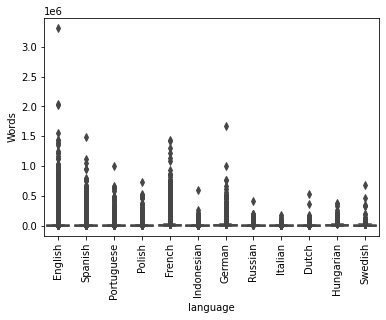

In [17]:
sns.boxplot(x='language', y='Words', data=df11)
plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
plt.show()

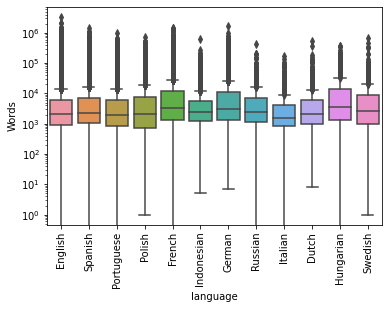

In [18]:
# same plot on a log scale
sns.boxplot(x='language', y='Words', data=df11)
plt.yscale("log") # display the y axis on a log scale
plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
plt.show()

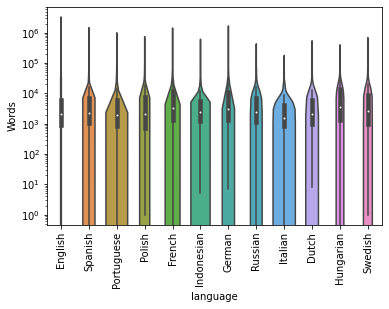

In [19]:
sns.violinplot(x='language', y='Words', data=df11)
plt.yscale("log") # display the y axis on a log scale
plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
plt.show()

In [20]:
freq_word_11 = df11[["language", "Words"]].groupby(by = "language")\
.agg(["min", "mean", "median", "max"])

freq_word_11.reset_index(col_level = 0, inplace = True)
#freq_word_11.sort_values(by = "mean", inplace = True) => find how to access the second line index in multi-index dataframe

freq_word_11

language Words                               
                 min          mean  median      max
0        Dutch     8   9154.754408  2028.5   532493
1      English     0   9758.770733  2067.0  3315736
2       French     0  16184.459459  3425.0  1430042
3       German     7  15927.721116  3177.0  1668571
4    Hungarian     0  17730.256055  3575.0   379793
5   Indonesian     5   7246.838825  2382.0   606169
6      Italian     0   6060.073016  1562.5   170865
7       Polish     1  13666.866249  2166.5   732509
8   Portuguese     0   9995.833902  1997.0   996953
9      Russian     0  10713.419929  2368.0   418357
10     Spanish     0  11918.648403  2329.0  1481060
11     Swedish     1  12984.445665  2658.0   675377

We see that there are no huge differences in terms of length between the different languages. There are some noticeable outlayers, like the lengthiest story in English which is twice the size of any other story and some languages (German, Indonesian, Dutch) don't have very short stories.

## Analysis of Stories by number of chapter

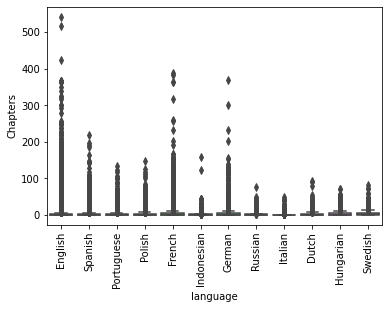

In [21]:
sns.boxplot(x='language', y='Chapters', data=df11)
plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
plt.show()

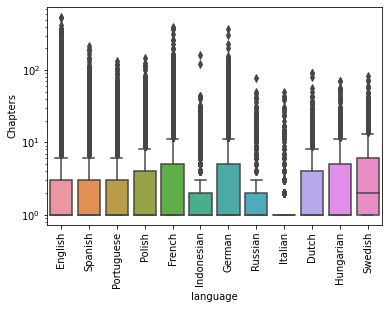

In [22]:
# same plot on a log scale
sns.boxplot(x='language', y='Chapters', data=df11)
plt.yscale("log") # display the y axis on a log scale
plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
plt.show()

In [23]:
freq_chap_11 = df11[["language", "Chapters"]].groupby(by = "language")\
.agg(["min", "mean", "median", "max"])

freq_chap_11.reset_index(col_level = 0, inplace = True)
#freq_word_11.sort_values(by = "mean", inplace = True) => find how to access the second line index in multi-index dataframe

freq_chap_11

language Chapters                      
                    min      mean median  max
0        Dutch        1  4.562972    1.0   92
1      English        1  4.072114    1.0  542
2       French        1  5.299418    1.0  389
3       German        1  5.793409    1.0  369
4    Hungarian        1  5.256055    1.0   71
5   Indonesian        1  2.663105    1.0  160
6      Italian        1  2.323810    1.0   50
7       Polish        1  4.677575    1.0  149
8   Portuguese        1  3.712577    1.0  134
9      Russian        1  3.654804    1.0   77
10     Spanish        1  4.122581    1.0  218
11     Swedish        1  6.032967    2.0   82

We can identify some clearer differences on the number of chapters. Even though most of the language have half of their stories which have only one chapter, we see that some few languages have stories with many chapters (English, French, German), whereas some other languages have mainly stories of one chapter (Indonesian, Russian and strickingly Italian which has 75% of its stories as one-chapter)

## Analysis of the ratings used by language

In [24]:
# group first by language & rating to count the number of stories
rating11 = df11[["title", "language", "rating"]].groupby(by = ["language", "rating"]).count()
rating11.reset_index(inplace = True)

rating11

,language,rating,title
0,Dutch,K,218
1,Dutch,K+,233
2,Dutch,M,56
3,Dutch,T,287
4,English,K,71502
5,English,K+,112656
6,English,M,110631
7,English,T,211254
8,French,K,14759
9,French,K+,9656


In [25]:
# from raw value to percentage
total = rating11.groupby('language')['title'].sum().reset_index()
ratingT = rating11[rating11.rating=='T'].groupby('language')['title'].sum().reset_index()
ratingT['percent'] = [i / j * 100 for i,j in zip(ratingT['title'], total['title'])]

ratingK = rating11[rating11.rating=='K'].groupby('language')['title'].sum().reset_index()
ratingK['percent'] = [i / j * 100 for i,j in zip(ratingK['title'], total['title'])]

ratingKplus = rating11[rating11.rating=='K+'].groupby('language')['title'].sum().reset_index()
ratingKplus['percent'] = [i / j * 100 for i,j in zip(ratingKplus['title'], total['title'])]

ratingM = rating11[rating11.rating=='M'].groupby('language')['title'].sum().reset_index()
ratingM['percent'] = [i / j * 100 for i,j in zip(ratingM['title'], total['title'])]

total['percent'] = [i / j * 100 for i,j in zip(total['title'], total['title'])]

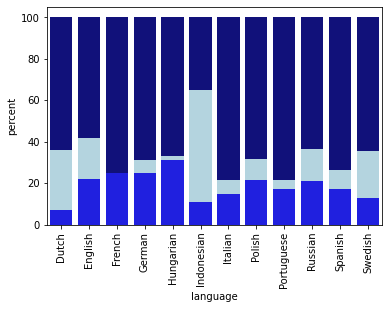

In [26]:
# Draw the graph
# bar chart 1 -> top bars 
bar1 = sns.barplot(x="language",  y="percent", data=total, color='darkblue')

# bar chart 2 -> bottom bars 
bar2 = sns.barplot(x="language", y="percent", data=ratingT, color='lightblue')

# bar chart 3
bar3 = sns.barplot(x="language", y="percent", data=ratingM, color='blue')

# add legend
#top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
#bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
#plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation = 90) # turn the labels at 90 for better readibility
# show the graph
plt.show()